# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset analyzed contains information about more than 10000 movies, including the ratings given by users, the budget spent, the revenues earned and the date of the release.

The questions I will answer are the following:
<ol>
    <li>Which genres are the most popular from year to year?</li>
    <li>Do longer or shorter movies obtain higher scores on average?</li>
    <li>What characteristics are associated with movies that have high revenues?</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling



### General Properties

##### In this section I will load the data and look at the different columns, to see if I can remove any variable that is not useful for the analysis.

Load the data into a Pandas dataframe and display the first few rows.

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.shape

(10866, 21)

In [5]:
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


Let's drop all the variables that are not useful for the analysis.

In [6]:
df.drop(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count'], axis=1, inplace=True)
df.head(3)

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08


### Data Cleaning

##### In this section I will check if the dataset contains duplicate values, missing values or incorrect data types.

Check the data types of the variables.

In [7]:
df.dtypes

id                int64
popularity      float64
runtime           int64
genres           object
vote_average    float64
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

The data types are correct. Let's now look for duplicate values.

In [8]:
df[df.duplicated()]

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,92,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0


In [9]:
sum(df.duplicated())

1

Drop duplicate values.

In [10]:
df = df.drop_duplicates()
sum(df.duplicated())

0

Let's now check if there are any missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
id              10865 non-null int64
popularity      10865 non-null float64
runtime         10865 non-null int64
genres          10842 non-null object
vote_average    10865 non-null float64
release_year    10865 non-null int64
budget_adj      10865 non-null float64
revenue_adj     10865 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 763.9+ KB


Let's drop rows that have missing values and check if there are any null values left (returns False if no null values are found)

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.isnull().sum().any()

False

The column 'genres' contains multiple values separated by a pipe ( | ) character. Let's create a second dataframe object in which we split these values by creating multiple rows, each one containing only one genre, that will be used to answer to the first question.

In [14]:
df_genres=df.copy()

In [15]:
df_genres['genres']=df_genres['genres'].str.split('|')

In [16]:
df_genres=df_genres.explode('genres')
df_genres.reset_index(drop=True, inplace=True)

In [17]:
df_genres.head()

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,Action,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,124,Adventure,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,124,Science Fiction,6.5,2015,1.379999e+08,1.392446e+09
3,135397,32.985763,124,Thriller,6.5,2015,1.379999e+08,1.392446e+09
4,76341,28.419936,120,Action,7.1,2015,1.379999e+08,3.481613e+08


In [18]:
df_genres.shape

(26955, 8)

The column revenue_adj contains a lot of zeros. Let's create a new dataframe object in which we remove these values that will be used to answer to the third question.

In [19]:
df.loc[df['revenue_adj']==0].shape[0]

5993

In [20]:
df_revenues=df.loc[df['revenue_adj']!=0]
df_revenues.shape

(4849, 8)

<a id='eda'></a>
## Exploratory Data Analysis

##### In this section I will make some exploratory analysis in order to answer to the three questions stated at the beginning.

### 1. Which genres are the most popular from year to year?

To address this question let's calculate the average popularity for each genre across the years.

In [21]:
df_genres_grouped=df_genres.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()
df_genres_grouped

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305
...,...,...,...
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511


Then, we get the genre associated with the highest average popularity score of each year and plot the result with a bar chart.

In [22]:
df_genres_grouped=df_genres_grouped.groupby(['release_year']).max().reset_index().set_index('release_year')
df_genres_grouped.head()

,genres,popularity
release_year,,
1960,Western,0.811910
1961,Western,2.631987
1962,Western,0.942513
1963,Western,2.180410
1964,Western,0.930959


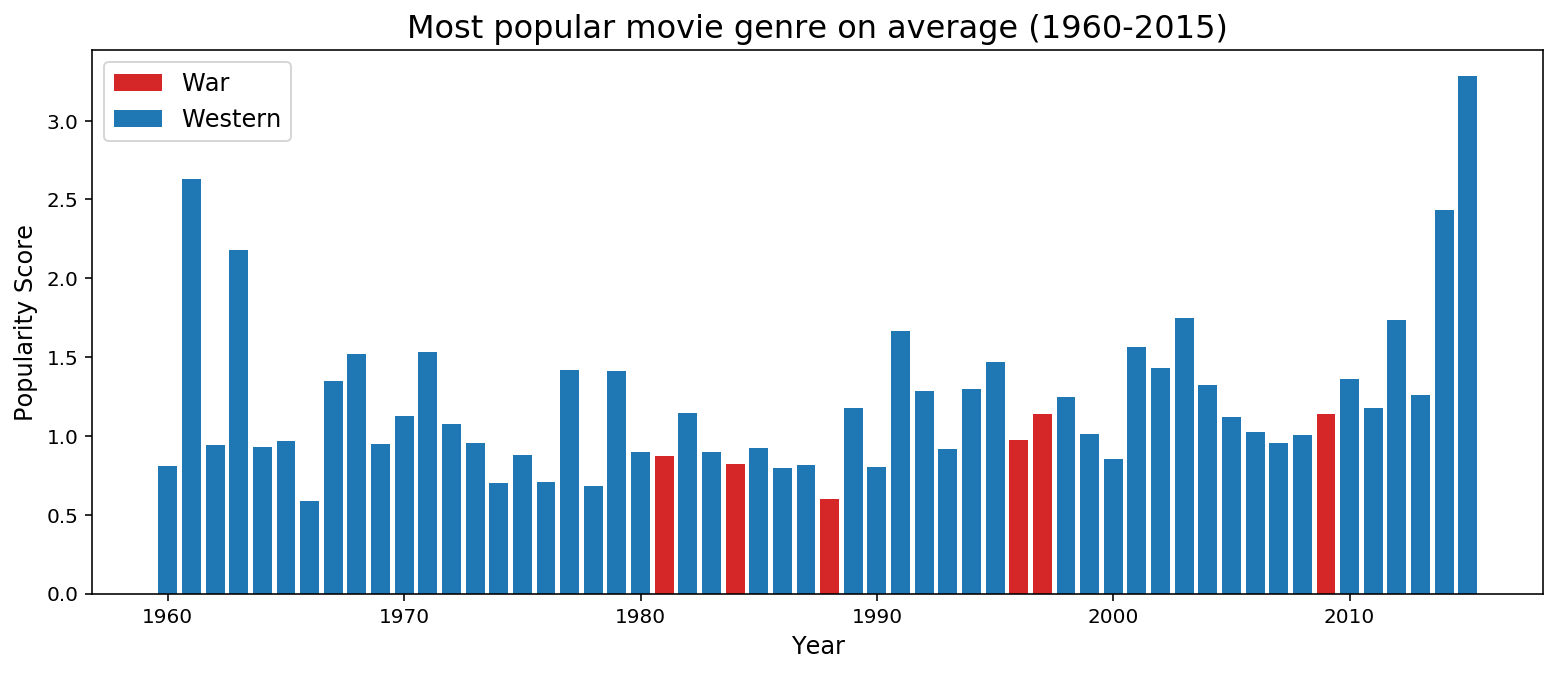

In [23]:
plt.figure(figsize=(13, 5))

df_war=df_genres_grouped.loc[df_genres_grouped['genres']=='War']
df_western=df_genres_grouped.loc[df_genres_grouped['genres']=='Western']

plt.bar(df_war.index, df_war['popularity'], color='tab:red', label='War')
plt.bar(df_western.index, df_western['popularity'], color='tab:blue', label='Western')

plt.title('Most popular movie genre on average (1960-2015)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.legend(fontsize=12)
plt.show()

Western is the most popular genre almost every year.

### 2. Do longer or shorter movies obtain higher scores on average?

First I must perform some data binning, therefore I will add a column containing a label defining the length of each movie, on the basis of the runtime.

In [24]:
bins = np.array([min(df["runtime"]), 60, 120, max(df["runtime"])])

In [25]:
group_names = ["Short", "Medium", "Long"]

In [26]:
df['length'] = pd.cut(df['runtime'], bins, labels=group_names, include_lowest=True)

In [27]:
df['length'].value_counts()

Medium    8931
Long      1578
Short      333
Name: length, dtype: int64

Calculate the average score of each category and visualize the result in a bar chart.

In [28]:
df.groupby('length')['vote_average'].mean()

length
Short     6.651351
Medium    5.856533
Long      6.496324
Name: vote_average, dtype: float64

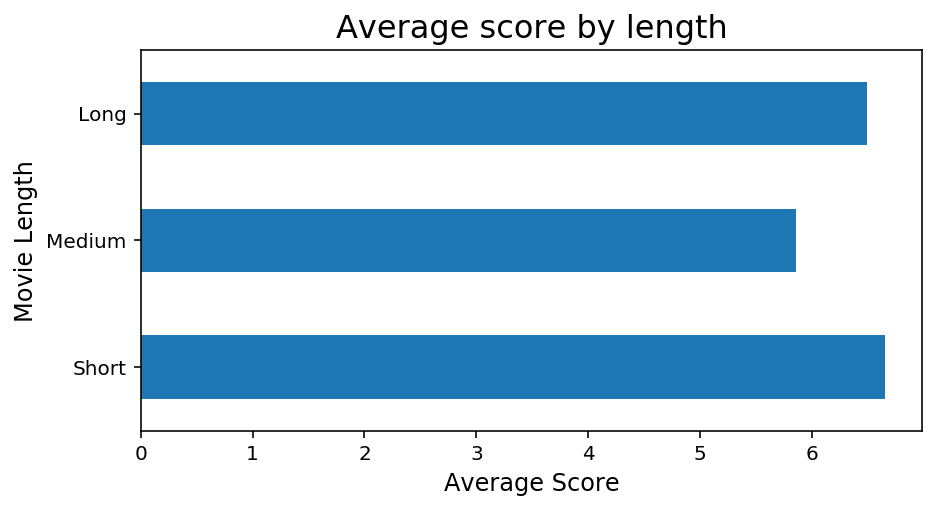

In [29]:
plt.figure(figsize=(7, 3.5))
df.groupby('length')['vote_average'].mean().plot(kind='barh')
plt.title("Average score by length", fontsize=16)
plt.ylabel("Movie Length", fontsize=12)
plt.xlabel("Average Score", fontsize=12)
plt.show()

### 3. What characteristics are associated with movies that have high revenues?

Let's define high revenues movies as those whose revenues are higher than the 75% of the data and low revenues movies as those whose revenues are lower than the 25% of the data.

In [30]:
df_highrev=df_revenues.loc[df_revenues['revenue_adj']>(df_revenues['revenue_adj'].quantile(q=0.75))]
df_highrev.head(2)

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08


In [31]:
df_lowrev=df_revenues.loc[df_revenues['revenue_adj']<(df_revenues['revenue_adj'].quantile(q=0.25))]
df_lowrev.head(2)

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
49,254320,2.885126,118,Thriller|Comedy|Drama|Romance|Science Fiction,6.6,2015,3.679998e+06,8.339346e+06
72,284289,2.272044,95,Thriller,5.5,2015,0.000000e+00,4.222338e+04


In [32]:
print(df_highrev.shape, df_lowrev.shape)

(1212, 8) (1212, 8)


Let's compare the characteristics of high revenue movies with the characteristics of low revenue movies.

In [33]:
df_revenues.corr()

,id,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.140274,-0.031108,0.007703,0.506720,-0.145814,-0.115453
popularity,0.140274,1.000000,0.201212,0.288988,0.170276,0.440049,0.561746
runtime,-0.031108,0.201212,1.000000,0.308064,-0.099446,0.304123,0.263914
vote_average,0.007703,0.288988,0.308064,1.000000,-0.094828,0.049090,0.242319
release_year,0.506720,0.170276,-0.099446,-0.094828,1.000000,0.083306,-0.099447
budget_adj,-0.145814,0.440049,0.304123,0.049090,0.083306,1.000000,0.593280
revenue_adj,-0.115453,0.561746,0.263914,0.242319,-0.099447,0.593280,1.000000


From the correlation matrix we can already see what are the characteristics that are more correlated with revenues: budget spent, popularity, runtime and average vote. 

##### Popularity

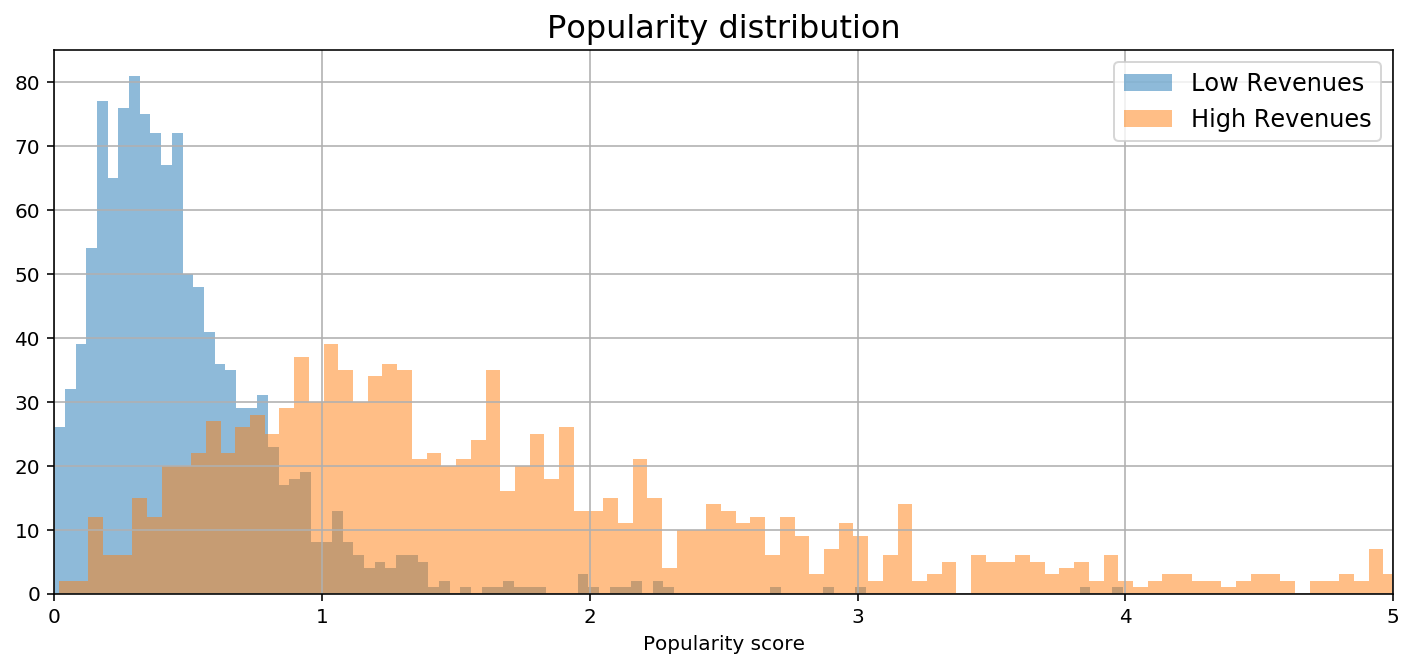

In [34]:
plt.figure(figsize=(12, 5))
df_lowrev['popularity'].hist(alpha=0.5, bins=100, label='Low Revenues')
df_highrev['popularity'].hist(alpha=0.5, bins=600, label='High Revenues')
plt.title('Popularity distribution', fontsize=16)
plt.xlabel('Popularity score')
plt.xlim(right=5, left=0)
plt.legend(fontsize=12)
plt.show()

The chart shows that movies that have high revenues are more popular than movies that have low revenues.

##### Runtime

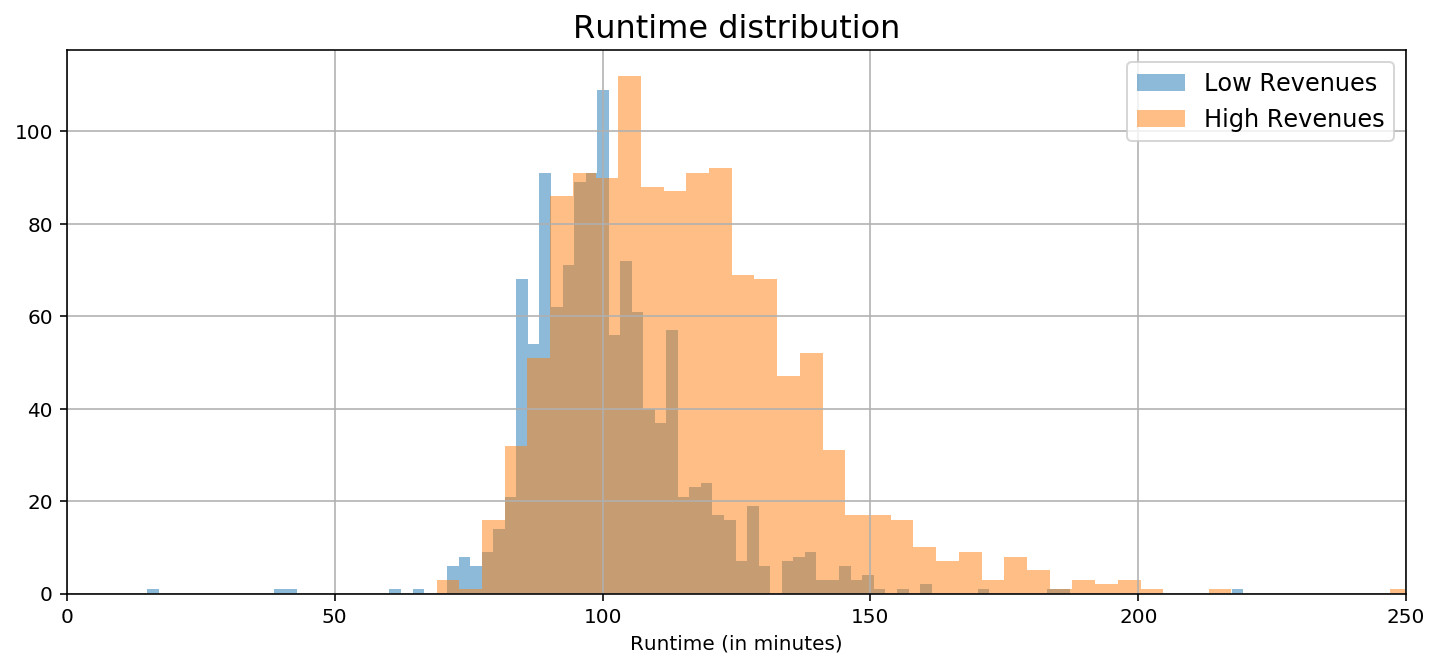

In [35]:
plt.figure(figsize=(12, 5))
df_lowrev['runtime'].hist(alpha=0.5, bins=150, label='Low Revenues')
df_highrev['runtime'].hist(alpha=0.5,bins=150, label='High Revenues')
plt.title('Runtime distribution', fontsize=16)
plt.xlabel('Runtime (in minutes)')
plt.xlim(right=250, left=0)
plt.legend(fontsize=12)
plt.show()

The chart shows that movies that have high revenues are slightly longer than movies with low revenues.

##### Average vote

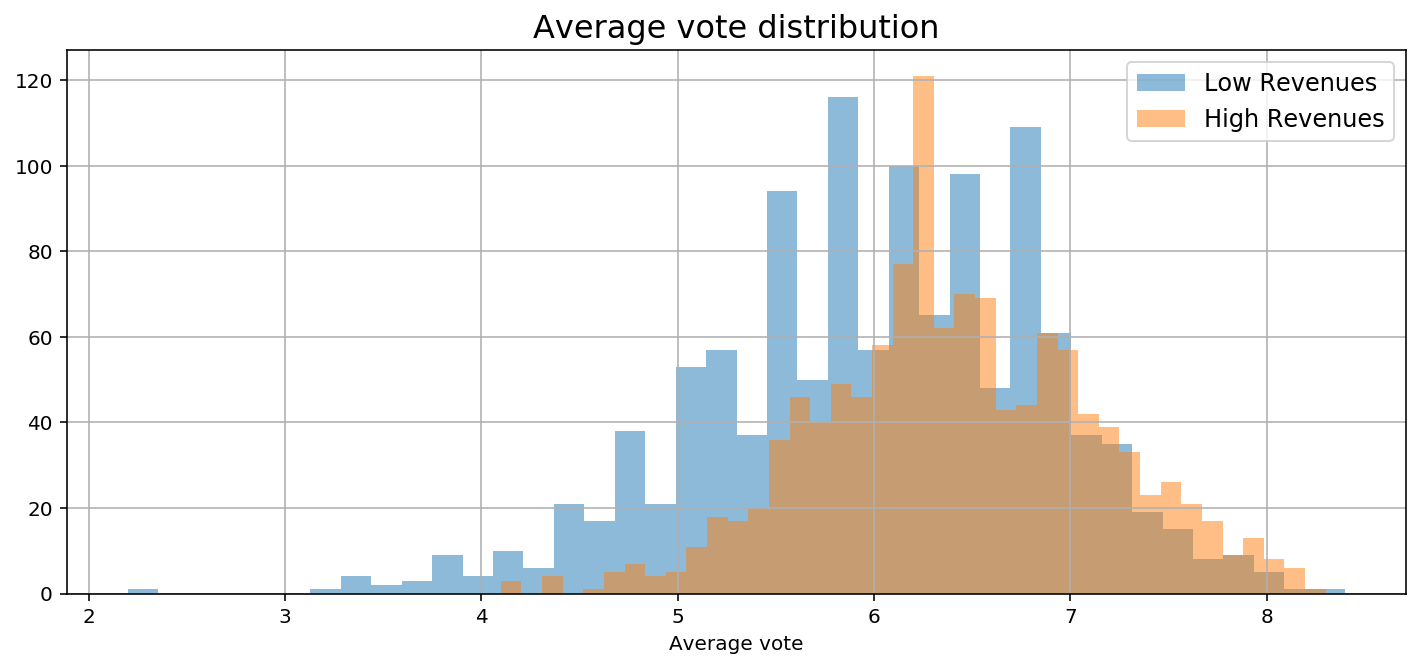

In [36]:
plt.figure(figsize=(12, 5))
df_lowrev['vote_average'].hist(alpha=0.5, bins=40, label='Low Revenues')
df_highrev['vote_average'].hist(alpha=0.5,bins=40, label='High Revenues')
plt.title('Average vote distribution', fontsize=16)
plt.xlabel('Average vote')
plt.legend(fontsize=12)
plt.show()

The chart does not show a clear difference between the distribution of movies with high revenues and those with low revenues.

##### Budget

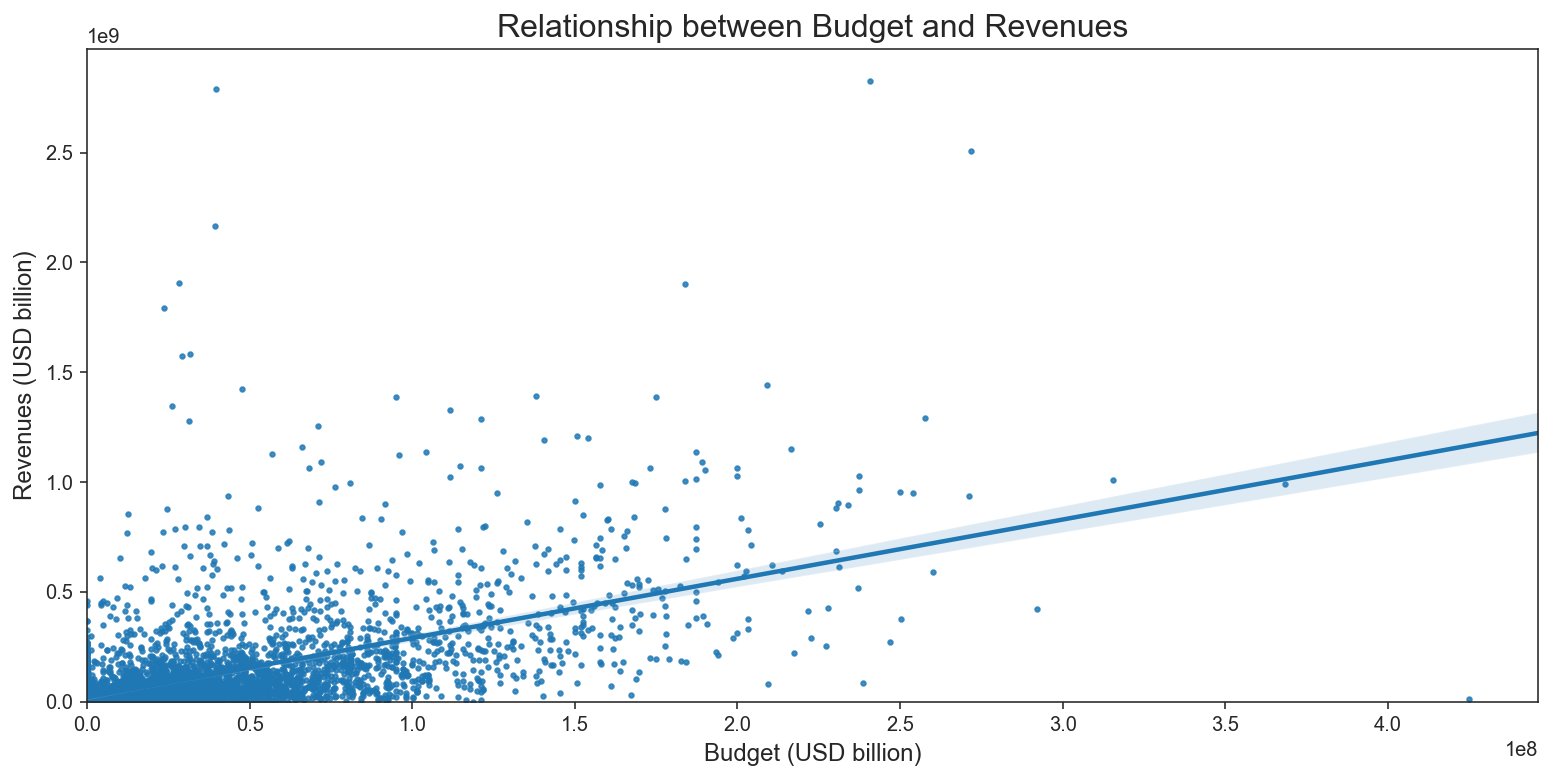

In [37]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(13, 6)
sns.regplot(x='budget_adj', y='revenue_adj', ax=ax, data=df_revenues, scatter_kws={'s':5})
plt.title('Relationship between Budget and Revenues', fontsize=16)
plt.ylabel('Revenues (USD billion)', fontsize=12)
plt.xlabel('Budget (USD billion)', fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

The chart shows a positive relationship between budget spent and revenues.

<a id='conclusions'></a>
## Conclusions

##### In this section I will summarize the results found during the previous step of the analysis.

#### Q1: Which genres are the most popular from year to year?
On average, western movies are the most popular almost every year, followed by war movies.

#### Q2: Do longer or shorter movies obtain higher scores on average?
On average, short movies (less than 60 minutes runtime) obtain higher scores, followed by long movies (more than 120 minutes runtime) and, finally, medium length movies. However, the difference between the three categories is rather low.

#### Q3: What characteristics are associated with movies that have high revenues?
Movies that earned high revenues are strongly associated with a higher budget and are more popular than movies that earned low revenues.

Furthermore, movies with a higher runtime and a higher average vote are also associated with higher revenues, although the correlation is weaker compared to variables like the budget spent or the popularity of the movie.

In [38]:
df_revenues.corrwith(df_revenues['revenue_adj'])

id             -0.115453
popularity      0.561746
runtime         0.263914
vote_average    0.242319
release_year   -0.099447
budget_adj      0.593280
revenue_adj     1.000000
dtype: float64

##### Limitations

<ul>

<li> The dataset includes about 10000 samples, therefore I think the number is a good representative for the population, although I do not know how the sampling process was made.</li>
<li> The column "revenue_adj" contained a lot of 0 values that I had to drop in order to answer to question number 3: this might have influenced the results of my analysis.</li>
<li> This is just an exploratory analysis, which contains some descriptive statistics. No inferential statistics or predictive models were used, so these results cannot be generalized. For example, to determine whether there is a statistically significant difference between the means of two groups we should use the Student's t-test.</li>
</ul>